In [3]:
from spacepy import pycdf
from os import listdir
from os.path import isfile, join
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [4]:
directory = "./fsmi_mag_data_2008-02/"
file_list = listdir(directory)
file_list.sort()
if file_list[0] == '.DS_Store':
    file_list.pop(0)

var = [str(i) for i in range(1, len(file_list)+1)]
locals().update({'fsmi_{}'.format(k): pycdf.CDF(directory+v) for k, v in zip(var, file_list)})
var_names = ['fsmi_{}'.format(i) for i in range(1, len(file_list)+1)]

In [5]:
def create_mag_dataframe(cdf, name):
    cdf_df = pd.DataFrame()
    cdf_dat = cdf.copy()
    epoch0 = cdf_dat['thg_mag_'+name+'_epoch0']
    cdf_df["Time"] = cdf_dat['thg_mag_'+name+'_time']
    cdf_df["Time"] = [epoch0 + dt.timedelta(0, cdf_df["Time"][i]) for i in range(cdf_df.shape[0])]
    cdf_df["Magnetic North - H (nT)"] = [x[0] for x in pd.Series(list(cdf_dat['thg_mag_'+name]))]
    cdf_df["Magnetic East - E (nT)"] = [x[1] for x in pd.Series(list(cdf_dat['thg_mag_'+name]))]
    cdf_df["Vertical Down - Z (nT)"] = [x[2] for x in pd.Series(list(cdf_dat['thg_mag_'+name]))]
    return cdf_df

def normalize_data(dataframe):
    median_h = np.nanmedian(dataframe["Magnetic North - H (nT)"])
    median_e = np.nanmedian(dataframe["Magnetic East - E (nT)"])
    median_z = np.nanmedian(dataframe["Vertical Down - Z (nT)"])
    dataframe["H [Normalized]"] = dataframe["Magnetic North - H (nT)"] - median_h
    dataframe["E [Normalized]"] = dataframe["Magnetic East - E (nT)"] - median_e
    dataframe["Z [Normalized]"] = dataframe["Vertical Down - Z (nT)"] - median_z

In [6]:
locals().update({'{}_df'.format(k): create_mag_dataframe(globals()[v], 'fsmi') for k, v in zip(var_names, var_names)})

In [7]:
df_list = [globals()[x+'_df'] for x in var_names]

In [8]:
full_month_df = pd.concat(df_list, ignore_index=True, axis=0)
normalize_data(full_month_df)
full_month_df

,Time,Magnetic North - H (nT),Magnetic East - E (nT),Vertical Down - Z (nT),H [Normalized],E [Normalized],Z [Normalized]
0,2008-02-01 00:00:00.000,10759.246094,-126.500999,58098.417969,59.036133,-4.611000,34.503906
1,2008-02-01 00:00:00.500,10759.251953,-126.586998,58098.445312,59.041992,-4.696999,34.531250
2,2008-02-01 00:00:01.000,10759.253906,-126.632004,58098.437500,59.043945,-4.742004,34.523438
3,2008-02-01 00:00:01.500,10759.331055,-126.688004,58098.488281,59.121094,-4.798004,34.574219
4,2008-02-01 00:00:02.000,10759.389648,-126.708000,58098.519531,59.179688,-4.818001,34.605469
...,...,...,...,...,...,...,...
5011195,2008-02-29 23:59:57.500,10882.088867,9.347000,57895.761719,181.878906,131.237000,-168.152344
5011196,2008-02-29 23:59:58.000,10882.136719,9.496000,57895.781250,181.926758,131.386000,-168.132812
5011197,2008-02-29 23:59:58.500,10882.119141,9.642000,57895.804688,181.909180,131.532000,-168.109375
5011198,2008-02-29 23:59:59.000,10882.075195,9.838000,57895.812500,181.865234,131.728000,-168.101562


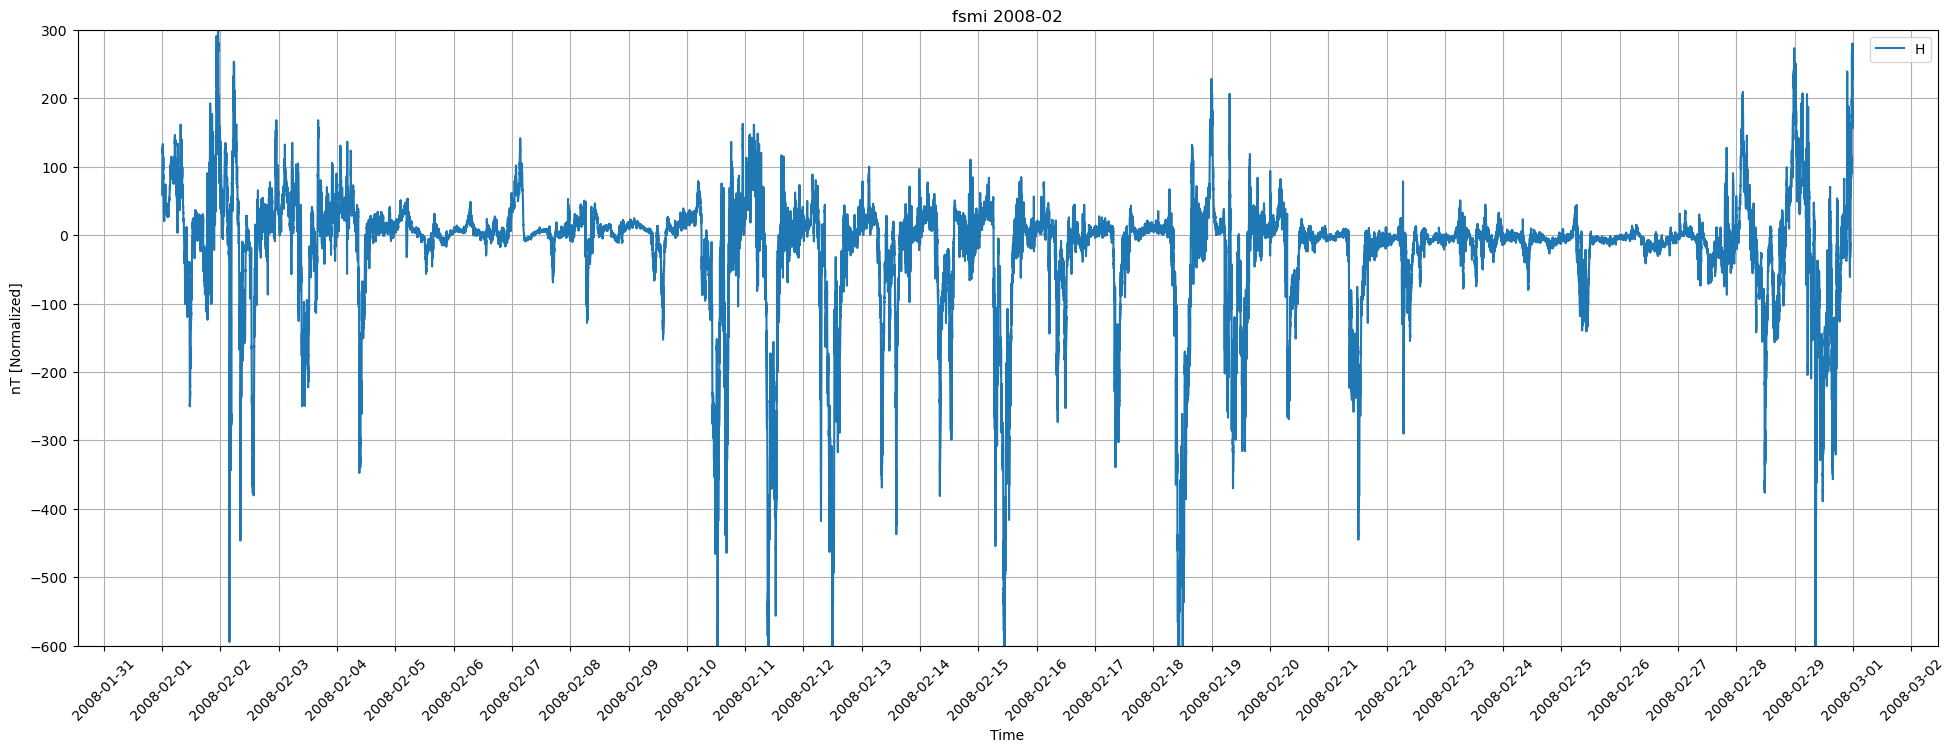

In [9]:
# Plot for entire day
def plot_single_station(dataframe, station_name):
    fig = plt.figure(figsize=(24, 8))
    ax = fig.gca()
    plt.plot(dataframe['Time'], dataframe['H [Normalized]'], label='H')
    #plt.plot(dataframe['Time'], dataframe['E [Normalized]'], label='E')
    #plt.plot(dataframe['Time'], dataframe['Z [Normalized]'], label='Z')
    plt.ylim(
        ymin=-600,
        ymax=300
    )
    plt.title(station_name)
    plt.xlabel("Time")
    plt.ylabel("nT [Normalized]")
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
    plt.xticks(rotation=45)
    plt.grid()
    plt.legend();
    
plot_single_station(full_month_df, "fsmi 2008-02")

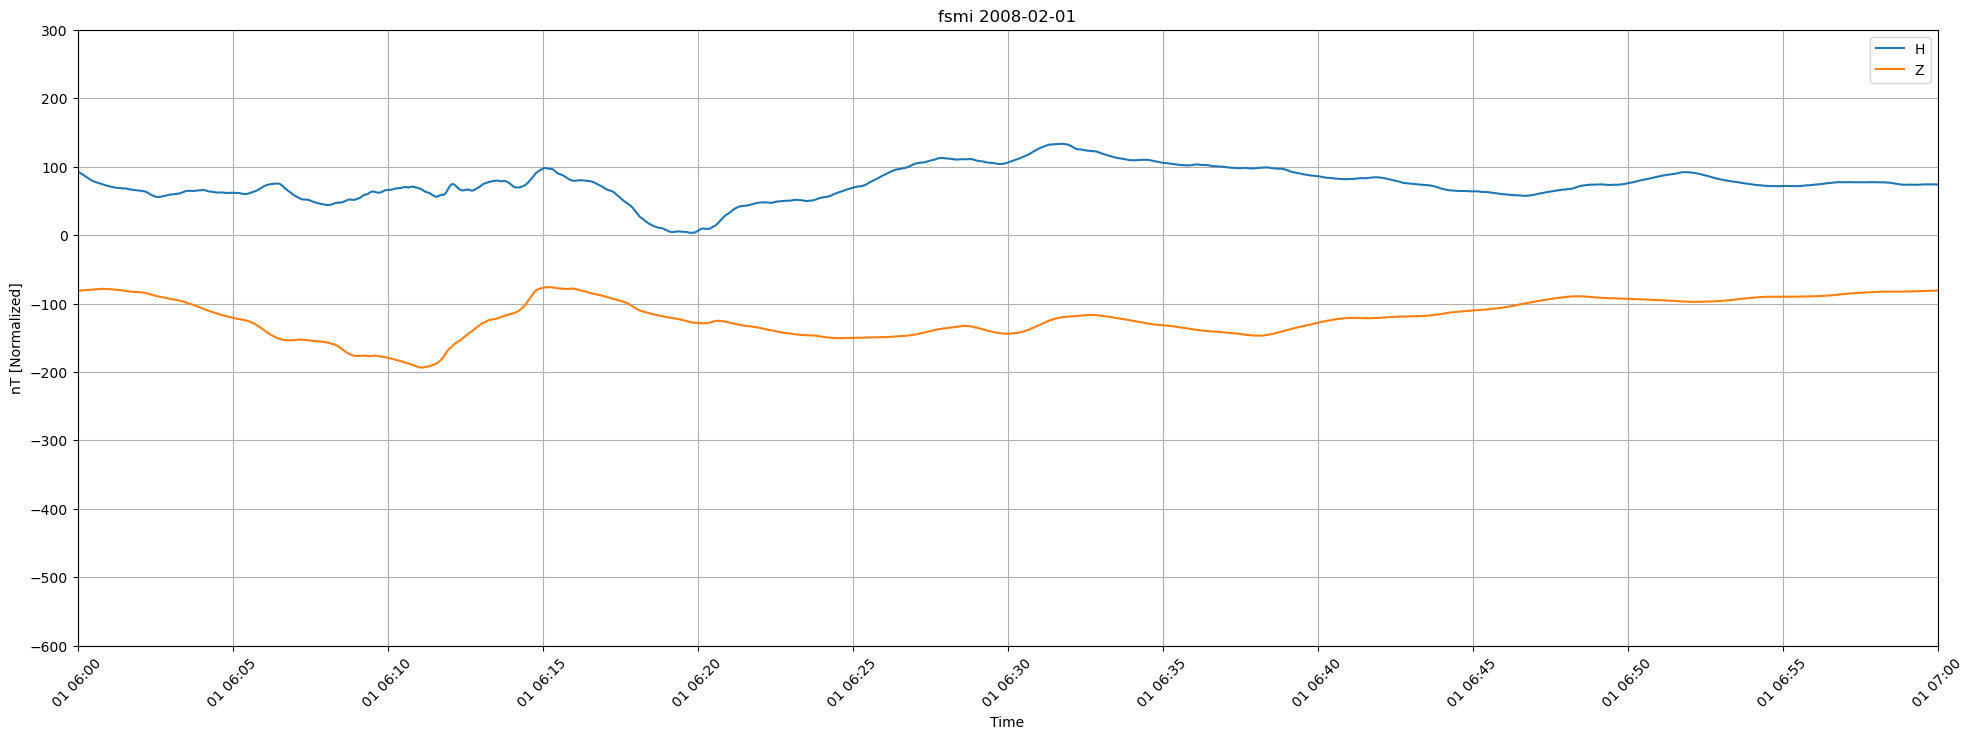

In [16]:
# Plot certain day
def plot_single_station(dataframe, title, bounds):
    fig = plt.figure(figsize=(24, 8))
    ax = fig.gca()
    plt.plot(dataframe['Time'], dataframe['H [Normalized]'], label='H')
    #plt.plot(dataframe['Time'], dataframe['E [Normalized]'], label='E')
    plt.plot(dataframe['Time'], dataframe['Z [Normalized]'], label='Z')
    plt.xlim(
        xmin=bounds[0],
        xmax=bounds[1]
    )    
    plt.ylim(
        ymin=-600,
        ymax=300
    )
    plt.title(title)
    plt.xlabel("Time")
    plt.ylabel("nT [Normalized]")
    ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=5))
    plt.xticks(rotation=45)
    plt.grid()
    plt.legend();
    
plot_single_station(full_month_df, 'fsmi 2008-02-01', [dt.datetime(2008, 2, 1, hour=6), dt.datetime(2008, 2, 1, hour=7)])
